# Modulación y democulación PCM con cuantización uniforme

La función seleccionada para realizar la modulación es la función: $h(x) = \sin(10x) + \sin(-11x)$. En el siguiente código se halla su periodo, su frecuencia y se muestra un gráfico con la función en azul y las marcas que marcan cada múltiplo periodo en rojo.

14


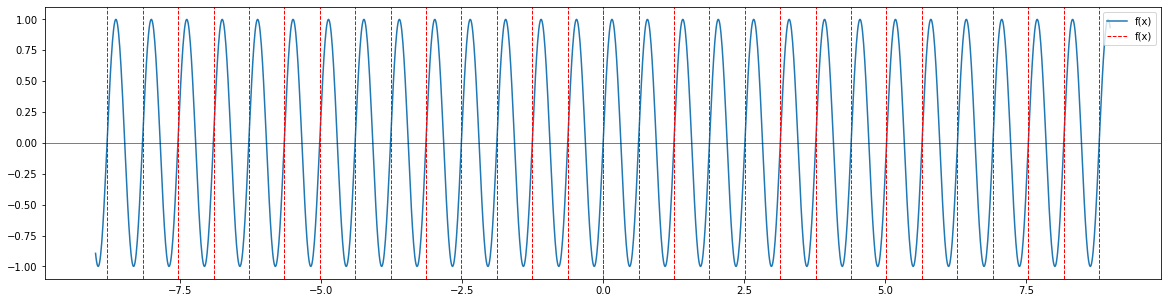

16


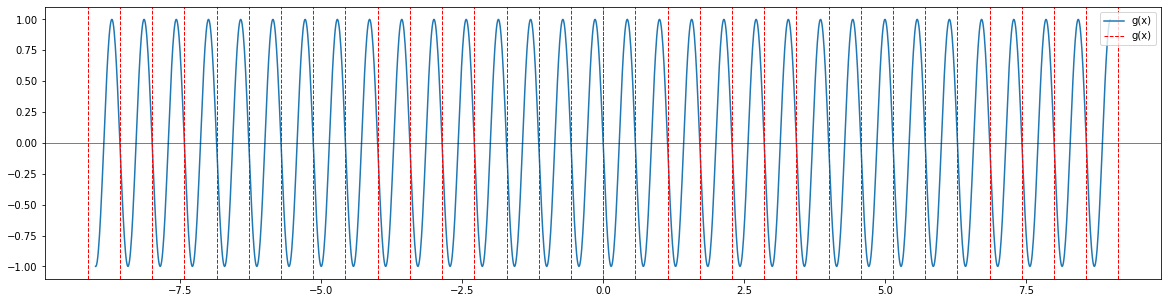

1


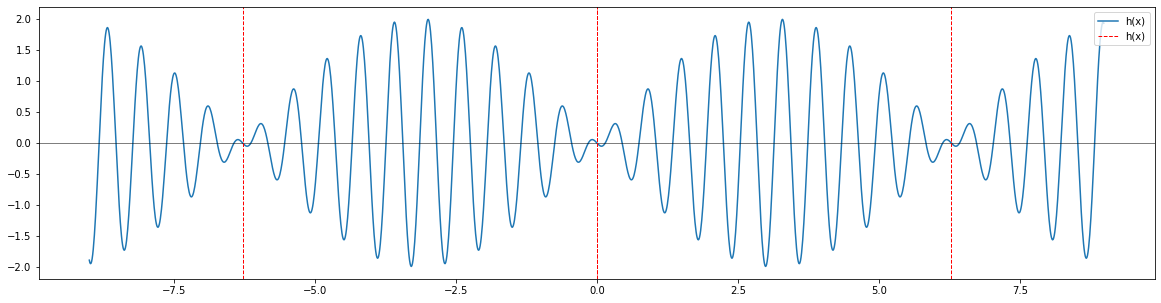

0.159 1.592 -1.751


In [320]:
import numpy as np
import matplotlib.pyplot as plt

def showPeriods(f, a, b, label, period, color):
    """
    Plot the periods of periods of f(x) between a and b.
    """
    ints = (b - a) // 2
    coincidences = abs(int(ints // period))
    plt.axvline(x= 0, color=color, linestyle='--', linewidth=1, label=label)
    print(coincidences)
    for k in range(coincidences + 1):
        plt.axvline(x=(k * period), color=color, linestyle='--', linewidth=1)
        plt.axvline(x=(-k * period), color=color, linestyle='--', linewidth=1)
    return

def h_function(x):
    """
    The h-function.
    """
    return np.sin(10 * x) + np.sin(-11 * x)


a = -9
b = 9
step = 0.01
x = np.arange(a,b, step)
f = np.sin(10*x)
g = np.sin(-11*x)
h = f + g

period = round(np.gcd(10, -11) * np.pi * 2, 3)
frequency = round(1/period, 3)

freqf = round(10/(2*np.pi), 3)
periodf = round(1/freqf, 3)

freqg = round(-11/(2*np.pi), 3)
periodg = round(1/freqg, 3)


plt.figure(figsize= (20,5))
plt.plot(x, f, label = 'f(x)')
showPeriods(f, a, b, 'f(x)', periodf, 'red')
plt.axhline(y=0, color='black', linewidth= 0.5)
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize= (20,5))
plt.plot(x, g, label = 'g(x)')
plt.axhline(y=0, color='black', linewidth= 0.5)
showPeriods(g, a, b, 'g(x)', periodg, 'red')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize= (20,5))
plt.plot(x, h, label='h(x)')
plt.axhline(y=0, color='black', linewidth= 0.5)
showPeriods(h, a, b, 'h(x)', period, 'red')
plt.legend(loc='upper right')
plt.savefig('xd.png')
plt.show()

print(frequency, freqf, freqg)


## Muestreo

Aplicando el teorema del muestreo: $f_s \geq 2f_m$. Entonces decimos que necesitamos una cantidad de muestras mayor a dos veces la frecuencia máxima. Como se calculó en el item anterior, obtuvimos 3 frecuencias. La de cada ciclo de la función $h(x) = \sin(10x) + \sin(-11x)$, y las de las funciones que son parte de cada suman: $f(x) = \sin(10x)$ y $g(x) = \sin(-11x)$

In [321]:
max_frequency = max(map(abs, (frequency, freqf, freqg)))

print(max_frequency)

min_samples_frequency = int(np.ceil(2 * max_frequency)) # Minimum samples per second. Or in other words, the minimum frequeny that must be sampled

print(min_samples_frequency)

1.751
4


Ahora, podemos gráficar nuestro tren de deltas de dirak $\delta(T_s)$

72


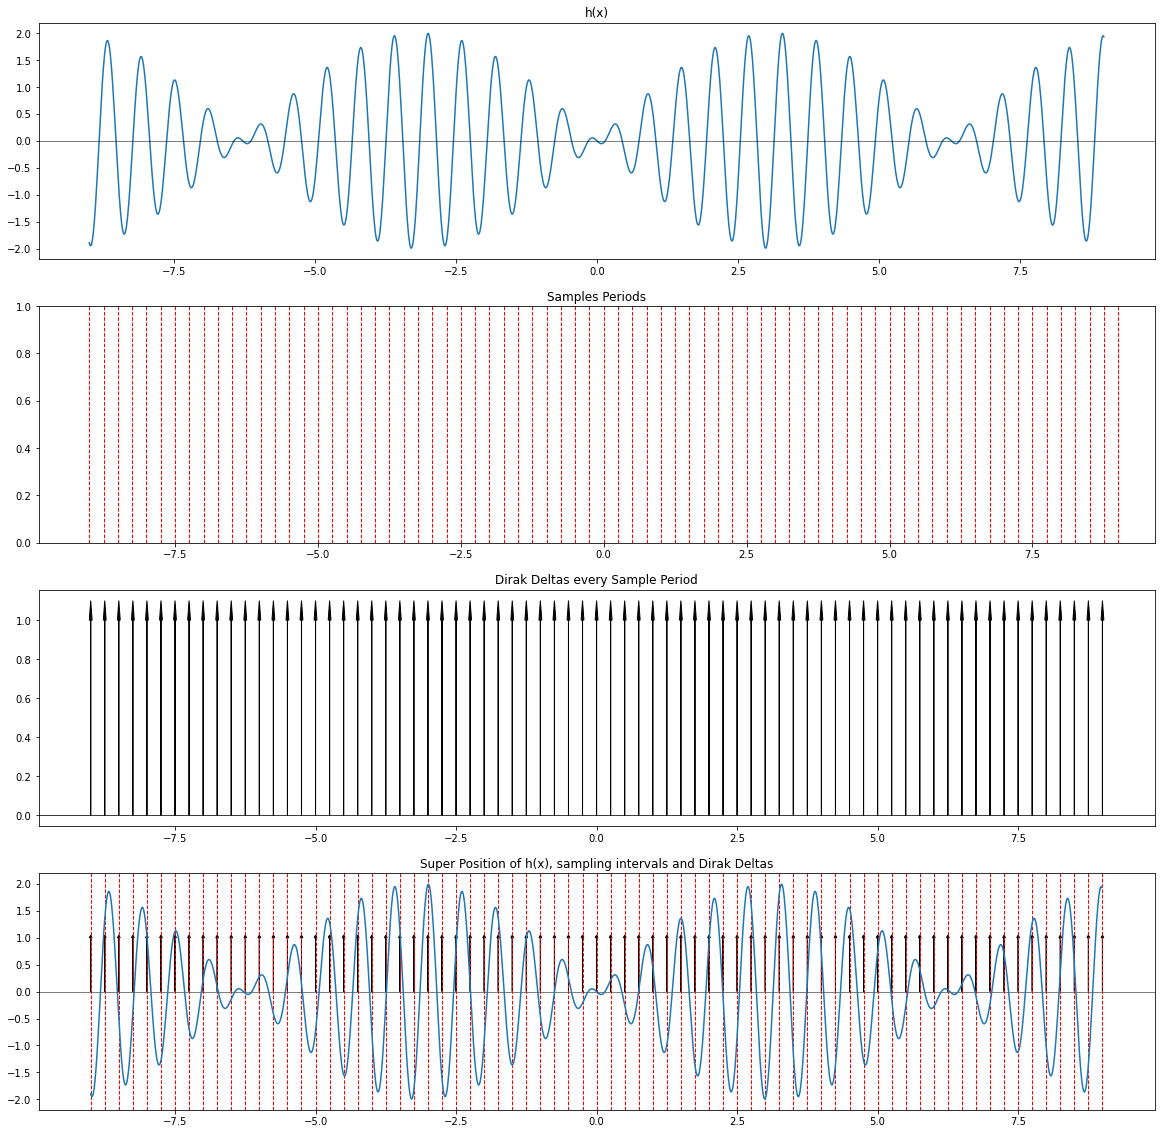

<Figure size 1440x360 with 0 Axes>

In [322]:
# We can add or multiply by positive numbers and we'll still satisfy sampling theorem

samples_frequency = min_samples_frequency
# in example, we can multily by two the samples per second will still satisfy sampling theorem

samples_periods = 1/samples_frequency

samples_amount = int(np.ceil((b - a) / samples_periods))

fig_samples, axs_samples = plt.subplots(4)
fig_samples.set_size_inches(20, 20)
axs_samples[0].plot(x, h, label = 'h(x)')
axs_samples[0].axhline(y=0, color='black', linewidth= 0.5)
axs_samples[1].axhline(y=0, color='black', linewidth= 0.5)
axs_samples[2].axhline(y=0, color='black', linewidth= 0.5)
axs_samples[3].axhline(y=0, color='black', linewidth= 0.5)

axs_samples[0].set_title('h(x)')
axs_samples[1].set_title('Samples Periods')
axs_samples[2].set_title('Dirak Deltas every Sample Period')
axs_samples[3].set_title('Super Position of h(x), sampling intervals and Dirak Deltas')

plt.figure(figsize=(20,5))
axs_samples[2].axhline(y=0, color='black', linewidth= 0.5)
for i in range( -samples_amount //2, samples_amount //2 + 1):
    axs_samples[1].axvline(x=i * samples_periods, color='red', linestyle='--', linewidth=1)
    axs_samples[3].axvline(x=i * samples_periods, color='red', linestyle='--', linewidth=1)
    axs_samples[2].arrow(i * samples_periods, 0, 0, 1, head_width=0.05, head_length=0.1, fc='k', ec='k')
    axs_samples[3].arrow(i * samples_periods, 0, 0, 1, head_width=0.05, head_length=0.05, fc='k', ec='k')
axs_samples[3].plot(x, h, label='h(x)')
print(samples_amount)


Del mismo modo, podemos gráficar nuestra función idealmente muestreada

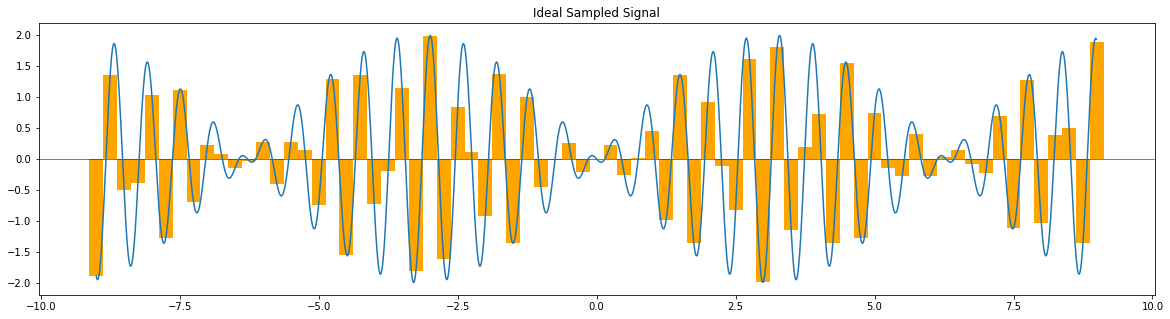

72


In [323]:
plt.figure(figsize=(20,5))
plt.axhline(y=0, color='black', linewidth= 0.5)
for i in range( -samples_amount //2, (samples_amount //2) + 1):
    # plt.arrow(i * samples_periods, 0, 0,h_function(i * samples_periods), head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.bar(i * samples_periods, h_function(i * samples_periods), width=samples_periods, color='orange')
plt.plot(x, h, label='h(x)')
plt.title('Ideal Sampled Signal')
plt.show()
print(samples_amount)

# Cuantización

Vamos a utilizar la cuantización uniforme. Para ello definiremos un $\Delta = \frac{2m_p}{L}$. Que para este caso usaremos a $L= 32$

In [324]:
h_arr = h
max_amplitude = max(map(abs, h_arr))
L = 32
Delta = (2 * max_amplitude) / L
print(Delta)

0.12464625275974525


El error de cuantización será $ -\frac{\Delta}{2} \leq q_e \leq \frac{\Delta}{2}  $

In [325]:
max_quantization_noise = Delta / 2
print(max_quantization_error)

0.0997170022077962


Asumiendo que el error sea siempre igualmente probable, decimos que: $ \langle q_e^2 \rangle = \frac{m_p^2}{3L^2}$

In [326]:
quantizing_noise_probability = (max_amplitude ** 2 )/( 3 * (L **2))
print(quantizing_noise_probability)

0.0012947240272538584


Ahora podemos gráficar nuestra señal cuantizada

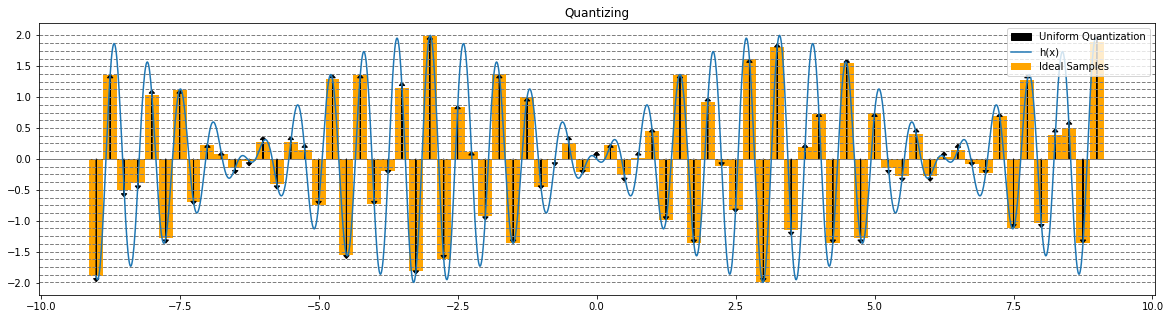

72


In [327]:
plt.figure(figsize=(20,5))
plt.axhline(y=0, color='black', linewidth= 0.5)
for i in range( -samples_amount //2, (samples_amount //2) + 1):
    quant_height = (h_function(i * samples_periods) / Delta)//1
    # print(quant_height * Delta)
    if (i == 0):
        plt.bar(i * samples_periods, h_function(i * samples_periods), width=samples_periods, color='orange', label='Ideal Samples')
        plt.arrow(i * samples_periods, 0, 0, quant_height * Delta + (Delta /2), head_width=0.1, head_length=0.05, fc='k', ec='k', color='green', label='Uniform Quantization')
    plt.bar(i * samples_periods, h_function(i * samples_periods), width=samples_periods, color='orange')
    plt.arrow(i * samples_periods, 0, 0, quant_height * Delta + (Delta / 2), head_width=0.1, head_length=0.05, fc='k', ec='k', color='green')
    
for i in range(- round(L /2) , round(L /2) + 1):
    plt.axhline(y=i * Delta, color='grey', linestyle='--', linewidth=1)
plt.plot(x, h, label='h(x)')
plt.legend(loc = 'upper right')
plt.savefig('quantizing.png')
plt.title('Quantizing')
plt.show()
print(samples_amount)

# Codificación

Cada uno de los niveles de cuantización tendrán una cantidad $n = \log_2(L)$. Por tanto, al ser L (arbitrariamente escogido) como una potencia de 2 $ L = 32 = 2 ^ 5$, entonces, $ n = \log_2(32) = 5 $

In [328]:
n = int (np.log2(L))
print(n)

5


Vamos a realizar una porción del método de cuantización para realizar la codificación. Así que poir cada punto cuantizado, guardaremos una señal binaria en una correspondencia 1 a 1 con los números naturales de 0 a 31, donde 0 es el valor de la mínima amplitud posible (-2), y 31 el de la máxima amplitud posible (2).

In [329]:
codification_values = []
codification_codes = []
for i in range( -samples_amount //2, (samples_amount //2) + 1):
    quant_height = int((((h_function(i * samples_periods)) + 2) / Delta)//1) # +2 to avoid negative values. Remember, 2 is the maximum absolute value of the signal.
    codification_values.append(quant_height) # keeps the quantization values as ints
    codification_codes.append(np.binary_repr(quant_height)) # keep as strings the values of the codification in binary representation
    print(int(codification_codes[i + samples_amount //2], 2), codification_codes[i + samples_amount //2], ', ', end='')
# print(len(codification_codes))


0 0 , 26 11010 , 12 1100 , 12 1100 , 24 11000 , 5 101 , 25 11001 , 10 1010 , 17 10001 , 16 10000 , 14 1110 , 15 1111 , 18 10010 , 12 1100 , 18 10010 , 17 10001 , 10 1010 , 26 11010 , 3 11 , 26 11010 , 10 1010 , 14 1110 , 25 11001 , 1 1 , 31 11111 , 3 11 , 22 10110 , 16 10000 , 8 1000 , 27 11011 , 5 101 , 24 11000 , 12 1100 , 15 1111 , 18 10010 , 14 1110 , 16 10000 , 17 10001 , 14 1110 , 16 10000 , 19 10011 , 8 1000 , 26 11010 , 5 101 , 23 10111 , 15 1111 , 9 1001 , 29 11101 , 0 0 , 30 11110 , 6 110 , 17 10001 , 21 10101 , 5 101 , 28 11100 , 5 101 , 21 10101 , 14 1110 , 13 1101 , 19 10011 , 13 1101 , 16 10000 , 17 10001 , 15 1111 , 14 1110 , 21 10101 , 7 111 , 26 11010 , 7 111 , 19 10011 , 20 10100 , 5 101 , 31 11111 , 

# Generación de formatos de señalización

Como tenemos una cantidad de muestras alta, podemos elegir al menos uno de los pulsos dados y mostrar como sería su formato de señalización usando gráficos de ondas cuadradas.

[1, 0, 0, 1, 0]


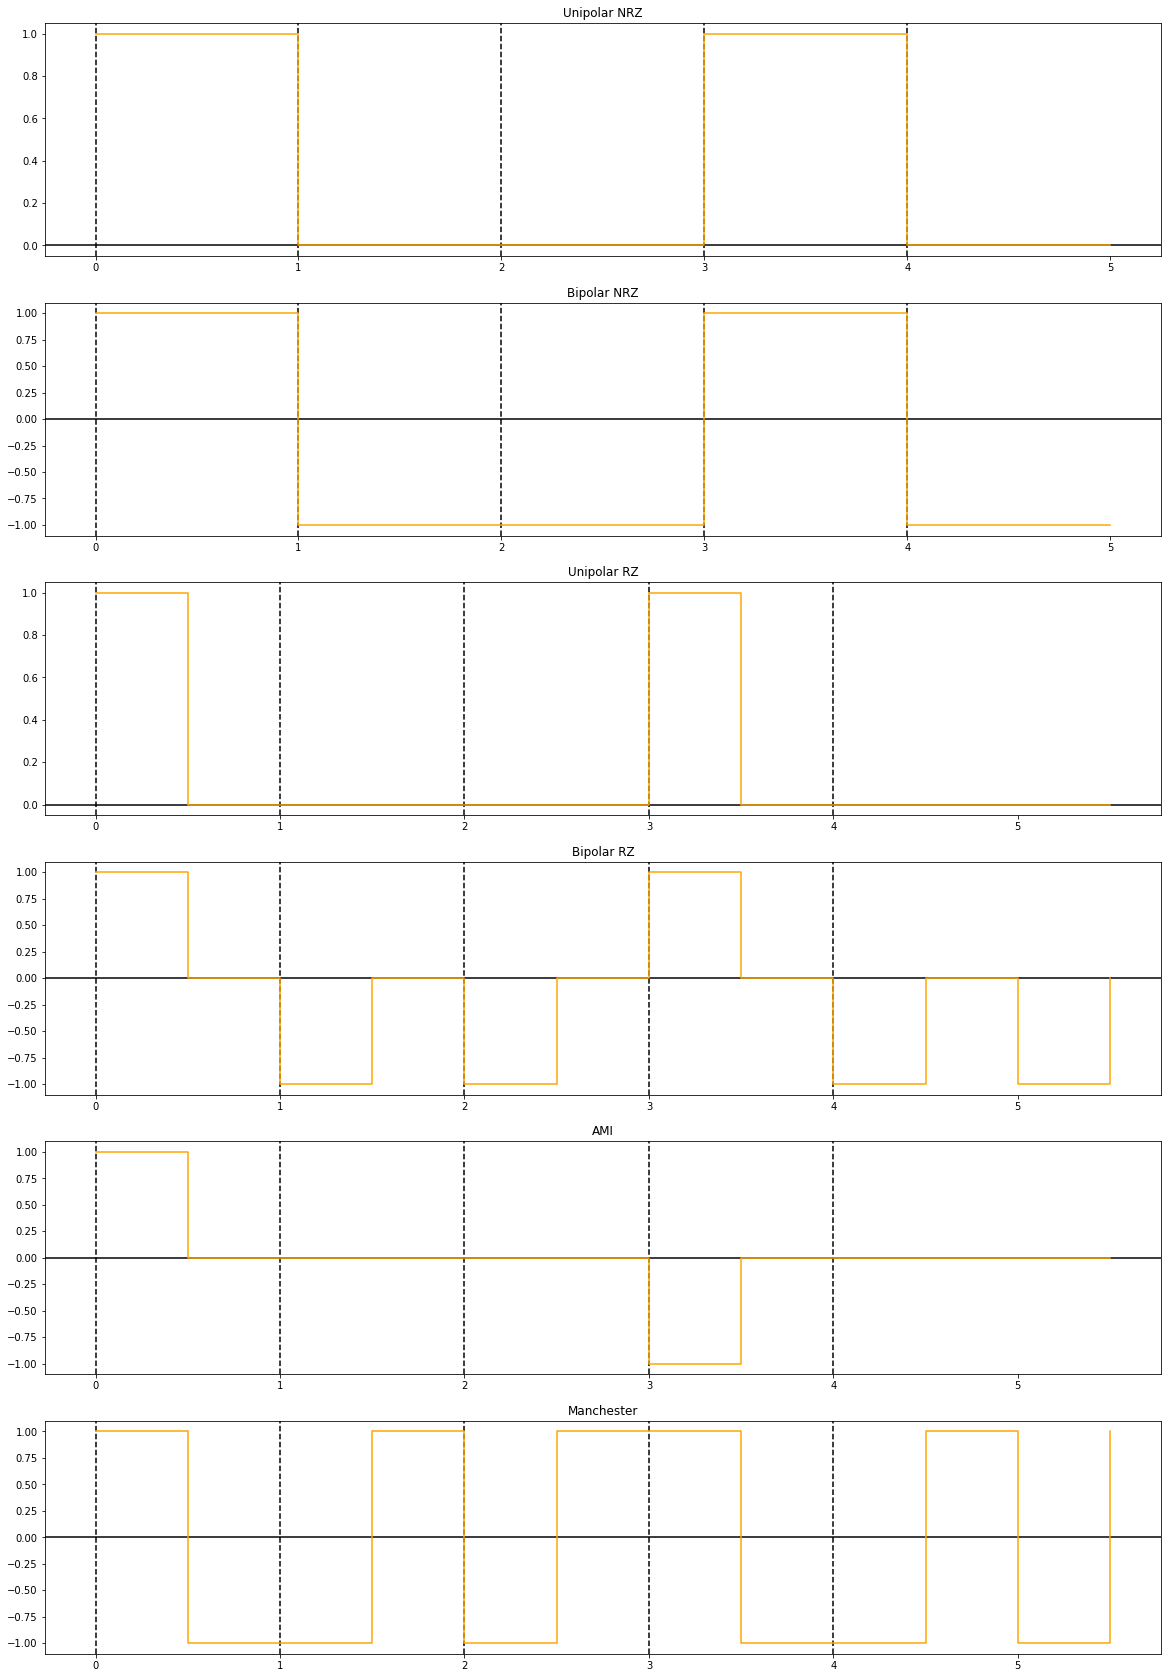

In [330]:
def unipolar_nrz(codification_code, pulse_length):
    unipolar_nrz_values = []
    codification_values = []
    for i in range(len(codification_code)):
        codification_values.append(int(codification_code[i]))
    while (len(codification_values) < pulse_length):
       codification_values.insert(0, 0)
    codification_values.append(codification_values[-1])
    for i in range(len(codification_values)):
        if (int(codification_values[i])):
            unipolar_nrz_values.append(1)
        else:
            unipolar_nrz_values.append(0)
    return unipolar_nrz_values

def bipolar_nrz(codification_code, pulse_length):
    bipolar_nrz_values = []
    codification_values = []
    for i in range(len(codification_code)):
        codification_values.append(int(codification_code[i]))
    while (len(codification_values) < pulse_length):
        codification_values.insert(0, 0)
    codification_values.append(codification_values[-1])
    for i in range(len(codification_values)):
        if (int(codification_values[i])):
            bipolar_nrz_values.append(1)
        else:
            bipolar_nrz_values.append(-1)
    return bipolar_nrz_values

def unipolar_rz(codification_code, pulse_length):
    unipolar_rz_values = []
    codification_values = []
    for i in range(len(codification_code)):
        codification_values.append(int(codification_code[i]))
    while (len(codification_values) < pulse_length):
        codification_values.insert(0, 0)
    codification_values.append(codification_values[-1])
    for i in range(len(codification_values)):
        if (int(codification_values[i])):
            unipolar_rz_values.append(1)
        else:
            unipolar_rz_values.append(0)
        unipolar_rz_values.append(0)
    return unipolar_rz_values

def bipolar_rz(codification_code, pulse_length):
    codification_values = []
    for i in range(len(codification_code)):
        codification_values.append(int(codification_code[i]))
    while (len(codification_values) < pulse_length):
        codification_values.insert(0, 0)
    codification_values.append(codification_values[-1])
    bipolar_rz_values = []
    for i in range(len(codification_values)):
        if (int(codification_values[i])):
            bipolar_rz_values.append(1)
        else:
            bipolar_rz_values.append(-1)
        bipolar_rz_values.append(0)
    return bipolar_rz_values

def ami(codification_code, pulse_length):
    ami_values = []
    ones = 0
    codification_values = []
    for i in range(len(codification_code)):
        codification_values.append(int(codification_code[i]))
    while (len(codification_values) < pulse_length):
        codification_values.insert(0, 0)
    codification_values.append(codification_values[-1])
    for i in range(len(codification_values)):
        if (int(codification_values[i])):
            if (ones %2):
                ami_values.append(-1)
            else:
                ami_values.append(1)
            ones += 1
        else:
            ami_values.append(0)
        ami_values.append(0)
    return ami_values

def manchester(codification_code, pulse_length):
    manchester_values = []
    codification_values = []
    for i in range(len(codification_code)):
        codification_values.append(int(codification_code[i]))
    while (len(codification_values) < pulse_length):
        codification_values.insert(0, 0)
    codification_values.append(codification_values[-1])
    for i in range(len(codification_values)):
        if (int(codification_values[i])):
            manchester_values.append(1)
            manchester_values.append(-1)
        else:
            manchester_values.append(-1)
            manchester_values.append(1)
    return manchester_values

pulse_length = 5
pulse = list(range(pulse_length + 1))
twice_pulse = []
for i in range((pulse_length + 1) * 2):
    twice_pulse.append(i/2)
random_pulse = np.random.randint(samples_amount + 1)
signal = unipolar_nrz(codification_codes[random_pulse], pulse_length)[:-1]
fig_signal_formats, axsf = plt.subplots(6)
fig_signal_formats.set_size_inches(20, 30)

for i in range(6):
    axsf[i].axhline(0, color='black')
    for j in range(pulse_length):
        axsf[i].axvline(x=j, color='black', linestyle='--')
axsf[0].plot(pulse, unipolar_nrz(codification_codes[random_pulse], pulse_length), label='Unipolar NRZ', drawstyle='steps-post', color='orange')
axsf[0].set_title('Unipolar NRZ')
axsf[1].plot(pulse, bipolar_nrz(codification_codes[random_pulse], pulse_length), label='Bipolar NRZ', drawstyle='steps-post', color='orange')
axsf[1].set_title('Bipolar NRZ')
axsf[2].plot(twice_pulse, unipolar_rz(codification_codes[random_pulse], pulse_length), label='Unipolar RZ', drawstyle='steps-post', color='orange')
axsf[2].set_title('Unipolar RZ')
axsf[3].plot(twice_pulse, bipolar_rz(codification_codes[random_pulse], pulse_length), label='Bipolar RZ', drawstyle='steps-post', color='orange')
axsf[3].set_title('Bipolar RZ')
axsf[4].plot(twice_pulse, ami(codification_codes[random_pulse], pulse_length), label='AMI', drawstyle='steps-post', color='orange')
axsf[4].set_title('AMI')
axsf[5].plot(twice_pulse, manchester(codification_codes[random_pulse], pulse_length), label='Manchester', drawstyle='steps-post', color='orange')
axsf[5].set_title('Manchester')
print(signal)


# Demodulador

Utilizando la ecuación:

$m(t) = \sum _{n=-\infty} ^{\infty} m(nT_s) \frac{\sin(\omega_M(t-nT_s))}{\omega_M(t-nT_s)}$

Demodularemos la señal que obtuvimos

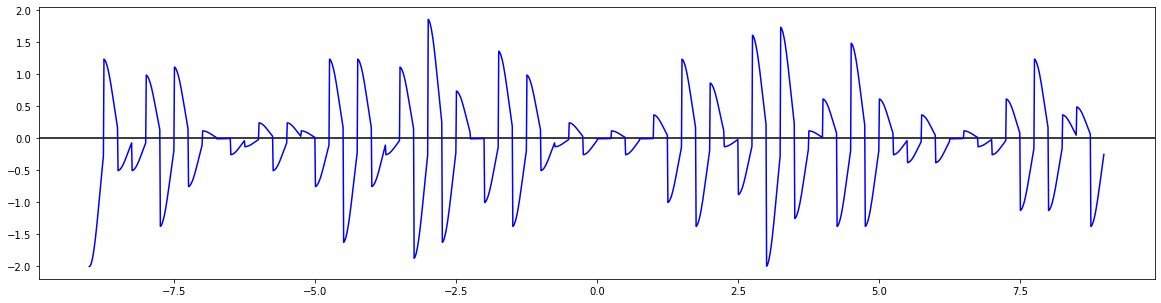

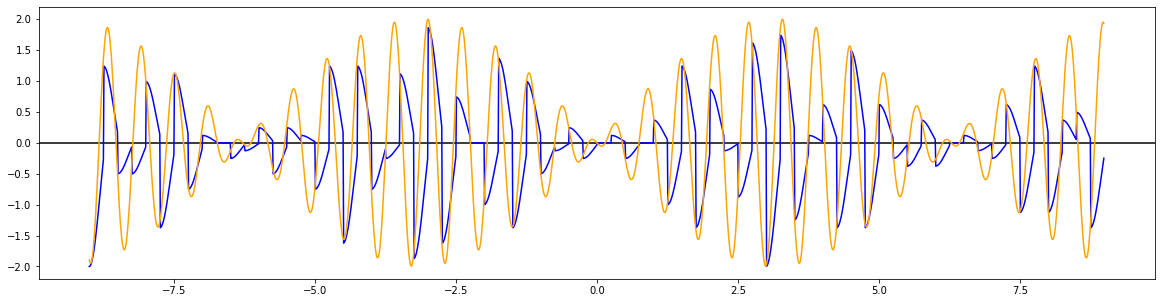

In [341]:
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

h_demodulated = []

m_i = 0
n = int(-(samples_amount //2))

for t in x:
    
    if (distance(n * samples_periods, t) >=  samples_periods):
        n+= 1
    i = n + (samples_amount // 2)
    nTs = n * samples_periods
    discret_m = (int(codification_codes[i], 2) * Delta) - 2
    if (t - nTs == 0):
        m_i = (discret_m )
    else: 
        m_i = (discret_m * (np.sin(11 * (t - nTs))/(11 * (t-nTs))))
    h_demodulated.append(m_i)


plt.figure(figsize=(20, 5))
plt.axhline(0, color='black')
plt.plot(x, h_demodulated, label='Demodulated signal', color='blue')
plt.show()

plt.figure(figsize=(20, 5))
plt.axhline(0, color='black')
plt.plot(x, h_demodulated, label='Demodulated signal', color='blue')
plt.plot(x, h, label='Original signal', color='orange')
plt.show()

